# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectFromModel
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Flight Price.csv')
df

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,NaN,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,NaN,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,NaN,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,NaN,13302


In [4]:
df.tail()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
#remove the unnamed:0 column 
df.drop(df.columns[0],axis=1,inplace=True)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,NaN,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,NaN,13302


In [7]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10607,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8286,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [9]:
df.shape

(10683, 11)

In [10]:
df.size

117513

In [11]:
#Handling Missing Values
df.isnull().sum().sum()

78

In [12]:
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info    76
Price               0
dtype: int64

In [13]:
df['Additional_Info'].unique()

array([nan, 'No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [14]:
df['Additional_Info'].value_counts()

No info                         8286
In-flight meal not included     1967
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [15]:
df['Additional_Info'].fillna(df['Additional_Info'].mode()[0],inplace=True)

In [16]:
df.isna().sum().sum()

2

In [17]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [19]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
df.dropna(subset=['Total_Stops'],inplace=True)

In [21]:
df.isna().sum().sum()

0

In [22]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [23]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [24]:
df.Date_of_Journey.min()

'01/03/2019'

In [25]:
df.Date_of_Journey.max()

'9/06/2019'

In [26]:
from datetime import datetime , date
df.Date_of_Journey.dtypes

dtype('O')

In [27]:
#ignore the warning statements
import warnings
warnings.filterwarnings('ignore')

df.Date_of_Journey=pd.to_datetime(df.Date_of_Journey)

In [28]:
df['Journey_day']=df.Date_of_Journey.dt.day
df['Journey_month']=df.Date_of_Journey.dt.month

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [30]:
#remove the Date_of_Journey column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [32]:
def dur_hour(x):
    if len(x.split()) < 2 :
        if 'h' in x.split()[0]:
            return x.split()[0]
        else:
            return '0h'
    else:
        return x.split()[0]

In [33]:
df['dur_hour']=df['Duration'].apply(lambda x : dur_hour(x))

In [34]:
def dur_minute(x):
    if len(x.split()) < 2 :
        if 'm' in x.split()[0]:
            return x.split()[0]
        else:
            return '0m'
    else:
        return x.split()[1]
    

df['dur_minute']=df['Duration'].apply(lambda x : dur_minute(x))

In [35]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19h,0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4h,45m


In [36]:
import re
df['dur_hour']=df['dur_hour'].apply(lambda x : int(re.sub("h","",x)))
df['dur_minute']=df['dur_minute'].apply(lambda x : int(re.sub("m","",x)))

In [37]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4,45


In [38]:
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,3,1,4,45


In [39]:
#Handling Categorical Variables
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
stop= {'1 stop' : 1 , 'non-stop' : 0 , '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4}

In [41]:
df.Total_Stops=df.Total_Stops.map(stop)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,3,1,4,45


In [42]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [43]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [46]:
df.loc[df.Additional_Info == 'No Info','Additional_Info'] = 'No info'
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [47]:
#Drop/Delete The Redundant Columns
df.drop(['Route','Dep_Time','Arrival_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,4,45


In [48]:
#Create The Dummy Variables
df=pd.get_dummies(df, columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,dur_hour,dur_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2,50,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2,7662,5,1,7,25,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,19,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,5,12,5,25,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,4,45,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10682 non-null  int64
 1   Price                                         10682 non-null  int64
 2   Journey_day                                   10682 non-null  int64
 3   Journey_month                                 10682 non-null  int64
 4   dur_hour                                      10682 non-null  int64
 5   dur_minute                                    10682 non-null  int64
 6   Airline_Air India                             10682 non-null  uint8
 7   Airline_GoAir                                 10682 non-null  uint8
 8   Airline_IndiGo                                10682 non-null  uint8
 9   Airline_Jet Airways                           10682 non-null  uint8
 10  Airline_Je

<AxesSubplot:>

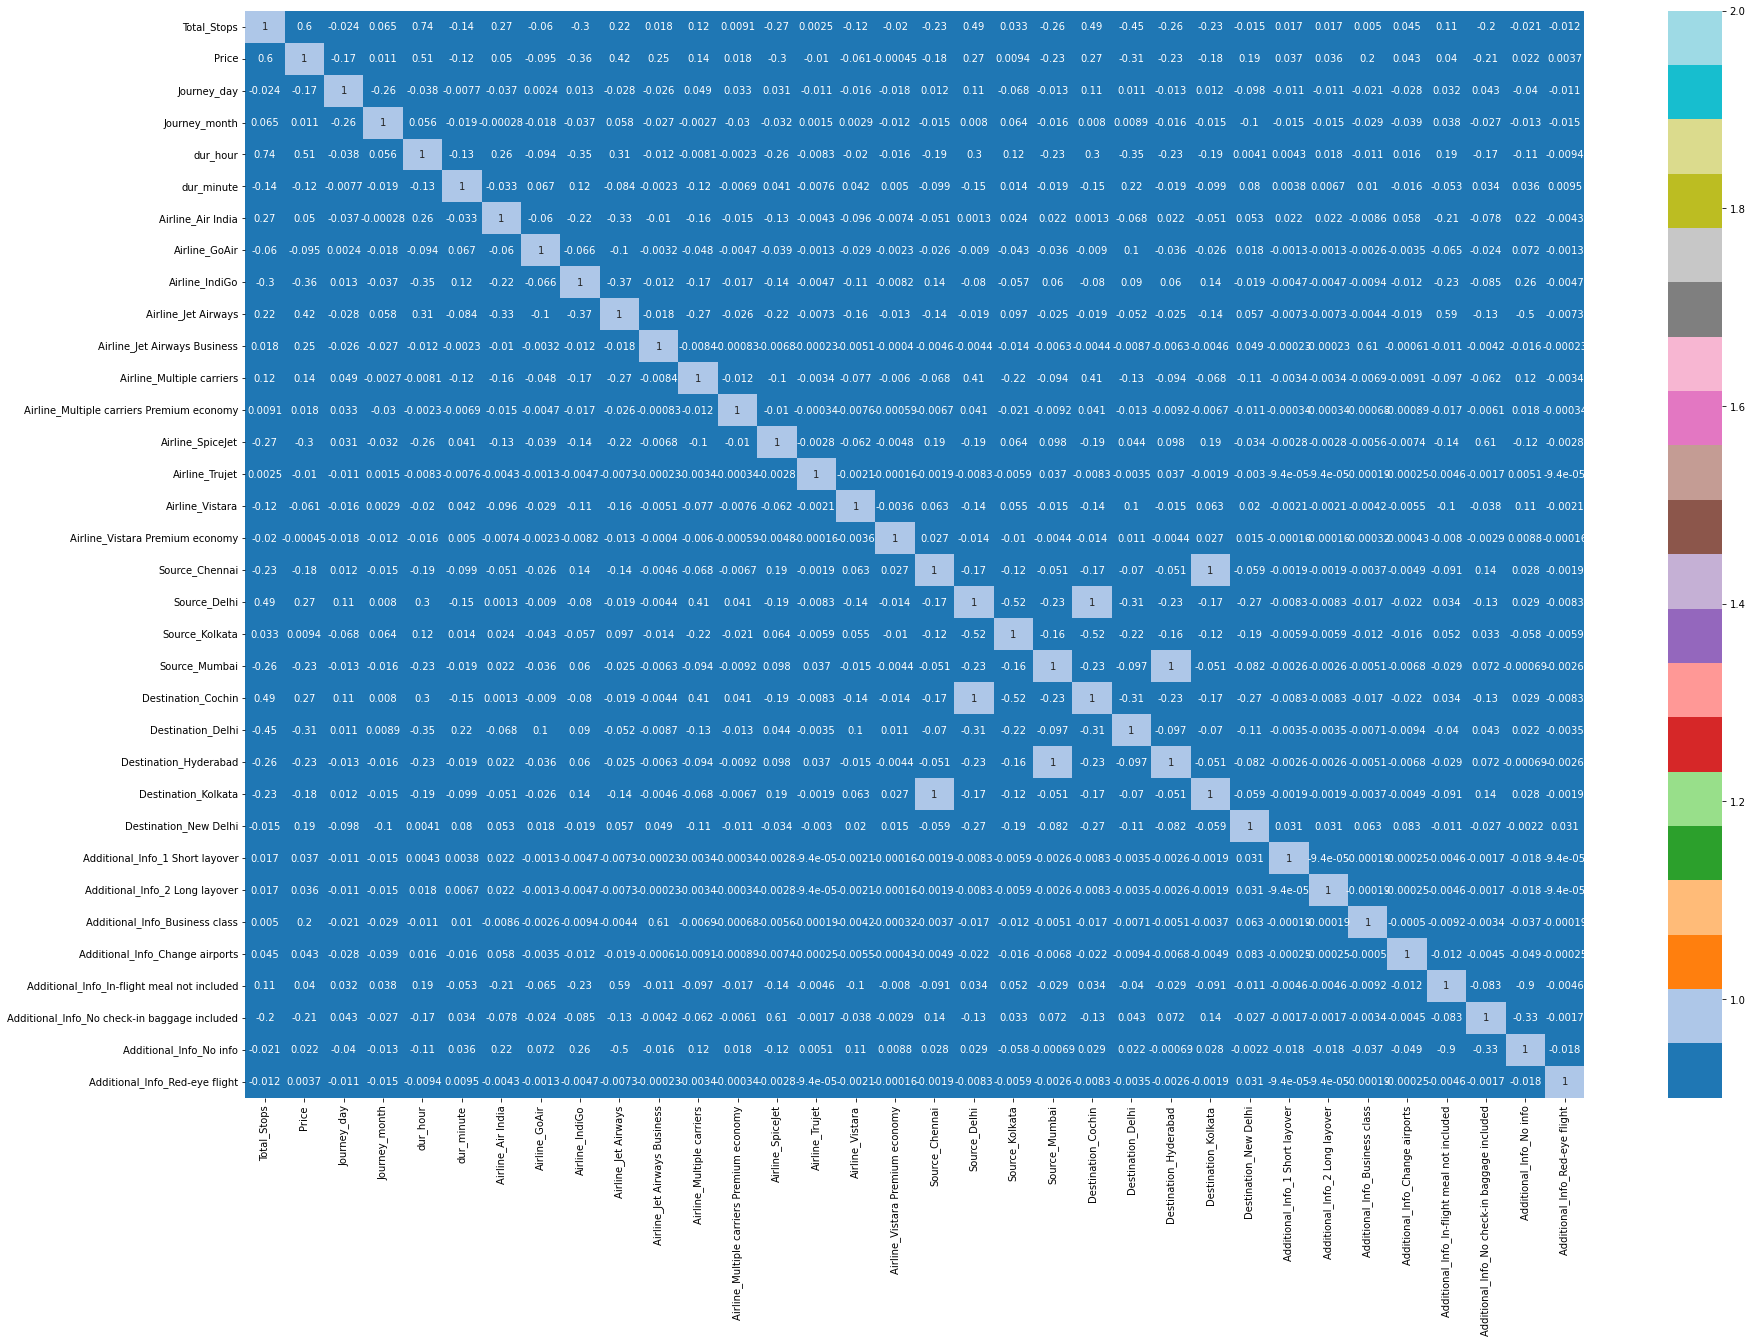

In [50]:
#Heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),round(2),cmap='tab20',annot=True)

In [51]:
df.select_dtypes('int64')

,Total_Stops,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,0,3897,24,3,2,50
1,2,7662,5,1,7,25
2,2,13882,6,9,19,0
3,1,6218,5,12,5,25
4,1,13302,3,1,4,45
...,...,...,...,...,...,...
10678,0,4107,4,9,2,30
10679,0,4145,27,4,2,35
10680,0,7229,27,4,3,0
10681,0,12648,3,1,2,40


In [52]:
for col in df.select_dtypes('int64'):
    print(f'maximum value of {col}',df[col].max())
    print(f'minimum value of {col}',df[col].min())

maximum value of Total_Stops 4
minimum value of Total_Stops 0
maximum value of Price 79512
minimum value of Price 1759
maximum value of Journey_day 27
minimum value of Journey_day 3
maximum value of Journey_month 12
minimum value of Journey_month 1
maximum value of dur_hour 47
minimum value of dur_hour 0
maximum value of dur_minute 55
minimum value of dur_minute 0


In [53]:
x = df.drop('Price',axis=1)
y = df['Price']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)

In [55]:
print(x_test.shape)
print(x_test.size)

(2137, 33)
70521


In [56]:
print(x_train.shape)
print(x_train.size)

(8545, 33)
281985


In [57]:
print(y_train.shape)
print(y_train.size)

(8545,)
8545


In [58]:
print(y_test.shape)
print(y_test.size)

(2137,)
2137


In [59]:
cls = DecisionTreeRegressor()

In [60]:
cls

DecisionTreeRegressor()

In [61]:
cross_val_score(cls,x,y,cv=10,scoring='r2',n_jobs=1)

array([0.79911464, 0.751692  , 0.71993824, 0.80585005, 0.7887173 ,
       0.82772956, 0.83012841, 0.77870732, 0.74785321, 0.74999063])

In [64]:
cls.fit(x_train,y_train)
r2_score(y_test , cls.predict(x_test))

0.731445812693748

In [65]:
#HYPER-PARAMETER TUNING

param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,3,4,5,6,7,8],
    #'min_samples_leaf' : [1,2,3,4],
    'max_features' : ["auto", "sqrt", "log2" , 5,8,10,12,15,20,25] }

In [66]:
rand_cv = RandomizedSearchCV(cls, param , n_iter=10, n_jobs=2 , scoring='r2' , cv= 10 ,random_state= 12)
rand_cv.fit(x,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         5, 8, 10, 12, 15, 20,
                                                         25],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'splitter': ['best', 'random']},
                   random_state=12, scoring='r2')

In [69]:
rand_cv.cv_results_

{'mean_fit_time': array([0.00896022, 6.902824  , 6.35843794, 0.01874321, 0.02842779,
        0.02704959, 0.02894466, 0.01573145, 7.39515991, 0.02290046]),
 'std_fit_time': array([7.62059781e-04, 2.40641194e+00, 1.04666947e+00, 3.74827410e-03,
        2.12671110e-03, 2.50213273e-03, 3.23250955e-03, 2.39801902e-03,
        1.56479883e+00, 2.79153598e-03]),
 'mean_score_time': array([0.00245378, 0.00389352, 0.00433607, 0.00524986, 0.00520134,
        0.00504317, 0.00489697, 0.00489831, 0.0059201 , 0.00395072]),
 'std_score_time': array([0.00065078, 0.00134978, 0.00070589, 0.00099916, 0.00096888,
        0.00054601, 0.00077841, 0.00063645, 0.00363129, 0.00083926]),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random', 'best', 'best',
                    'best', 'random', 'random', 'random'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_sample

In [70]:
rand_cv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10, max_features=10,
                      min_samples_split=4)

In [71]:
rand_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'max_features': 10,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [73]:
rand_cv.best_score_

0.7719103019377147

In [74]:
rand_cv.predict(x_test)

array([ 4823., 12898., 14714., ...,  7811.,  7811.,  9899.])

In [75]:
rand_cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'n_iter': 10,
 'n_jobs': 2,
 'param_distributions': {'criterion': ['squared_error',
   'friedman_mse',
   'absolute_error',
   'poisson'],
  'splitter': ['best', 'random'],
  'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
  'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
  'max_features': ['auto', 'sqrt', 'log2', 5, 8, 10, 12, 15, 20, 25]},
 'pre_dispatch': '2*n_jobs',
 'random_state': 12,
 'refit': True,
 'return_train_score': False,
 'scoring': 'r2',
 'verbose': 0}

# Saving The Model

In [76]:
import pickle
with open('model_decision_tree.pkl' , 'wb') as f:
    pickle.dump(rand_cv,f)

In [77]:
#another way to use pickle 
# pickle.dump(rand_cv , open('model_decison_tree.pkl','wb'))

In [78]:
model_tree = pickle.load(open('model_decision_tree.pkl' , 'rb'))

In [79]:
model_tree.get_params()
model_tree.cv_results_

{'mean_fit_time': array([0.00896022, 6.902824  , 6.35843794, 0.01874321, 0.02842779,
        0.02704959, 0.02894466, 0.01573145, 7.39515991, 0.02290046]),
 'std_fit_time': array([7.62059781e-04, 2.40641194e+00, 1.04666947e+00, 3.74827410e-03,
        2.12671110e-03, 2.50213273e-03, 3.23250955e-03, 2.39801902e-03,
        1.56479883e+00, 2.79153598e-03]),
 'mean_score_time': array([0.00245378, 0.00389352, 0.00433607, 0.00524986, 0.00520134,
        0.00504317, 0.00489697, 0.00489831, 0.0059201 , 0.00395072]),
 'std_score_time': array([0.00065078, 0.00134978, 0.00070589, 0.00099916, 0.00096888,
        0.00054601, 0.00077841, 0.00063645, 0.00363129, 0.00083926]),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random', 'best', 'best',
                    'best', 'random', 'random', 'random'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_sample

In [80]:
result=pd.DataFrame(model_tree.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008960,0.000762,0.002454,0.000651,best,2,sqrt,3,friedman_mse,"{'splitter': 'best', 'min_samples_split': 2, '...",...,0.342225,0.378040,0.476839,0.484163,0.398515,0.414439,0.501847,0.423514,0.055440,5
1,6.902824,2.406412,0.003894,0.001350,random,5,15,7,absolute_error,"{'splitter': 'random', 'min_samples_split': 5,...",...,0.712032,0.652205,0.650534,0.680362,0.698514,0.658585,0.736752,0.685989,0.031547,3
2,6.358438,1.046669,0.004336,0.000706,best,4,10,10,absolute_error,"{'splitter': 'best', 'min_samples_split': 4, '...",...,0.802797,0.800735,0.739912,0.765251,0.781573,0.800918,0.725418,0.771910,0.025041,1
3,0.018743,0.003748,0.005250,0.000999,random,6,sqrt,2,friedman_mse,"{'splitter': 'random', 'min_samples_split': 6,...",...,0.301197,0.211606,0.199368,0.210840,0.200812,0.149960,0.128495,0.188436,0.057619,8
4,0.028428,0.002127,0.005201,0.000969,best,7,25,2,poisson,"{'splitter': 'best', 'min_samples_split': 7, '...",...,-0.000384,-0.001126,0.106490,0.054611,-0.001554,-0.000356,0.166948,0.054079,0.062193,10
5,0.027050,0.002502,0.005043,0.000546,best,5,5,7,poisson,"{'splitter': 'best', 'min_samples_split': 5, '...",...,0.268107,0.550079,0.399876,0.327395,0.000477,0.207456,0.378570,0.296693,0.164578,6
6,0.028945,0.003233,0.004897,0.000778,best,8,25,3,squared_error,"{'splitter': 'best', 'min_samples_split': 8, '...",...,0.575091,0.630318,0.598238,0.575571,0.637760,0.612336,0.537334,0.588714,0.043130,4
7,0.015731,0.002398,0.004898,0.000636,random,5,5,2,squared_error,"{'splitter': 'random', 'min_samples_split': 5,...",...,0.233266,0.157141,0.216620,0.232783,0.268225,0.104865,0.421517,0.241695,0.084205,7
8,7.395160,1.564799,0.005920,0.003631,random,2,12,10,absolute_error,"{'splitter': 'random', 'min_samples_split': 2,...",...,0.733530,0.732631,0.767091,0.764157,0.761575,0.688780,0.709716,0.734179,0.027254,2
9,0.022900,0.002792,0.003951,0.000839,random,4,12,7,poisson,"{'splitter': 'random', 'min_samples_split': 4,...",...,0.007758,0.127648,0.305633,0.085997,0.186465,0.004518,0.347390,0.146005,0.115975,9


In [81]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008960,0.000762,0.002454,0.000651,best,2,sqrt,3,friedman_mse,"{'splitter': 'best', 'min_samples_split': 2, '...",...,0.342225,0.378040,0.476839,0.484163,0.398515,0.414439,0.501847,0.423514,0.055440,5
1,6.902824,2.406412,0.003894,0.001350,random,5,15,7,absolute_error,"{'splitter': 'random', 'min_samples_split': 5,...",...,0.712032,0.652205,0.650534,0.680362,0.698514,0.658585,0.736752,0.685989,0.031547,3
2,6.358438,1.046669,0.004336,0.000706,best,4,10,10,absolute_error,"{'splitter': 'best', 'min_samples_split': 4, '...",...,0.802797,0.800735,0.739912,0.765251,0.781573,0.800918,0.725418,0.771910,0.025041,1
3,0.018743,0.003748,0.005250,0.000999,random,6,sqrt,2,friedman_mse,"{'splitter': 'random', 'min_samples_split': 6,...",...,0.301197,0.211606,0.199368,0.210840,0.200812,0.149960,0.128495,0.188436,0.057619,8
4,0.028428,0.002127,0.005201,0.000969,best,7,25,2,poisson,"{'splitter': 'best', 'min_samples_split': 7, '...",...,-0.000384,-0.001126,0.106490,0.054611,-0.001554,-0.000356,0.166948,0.054079,0.062193,10


In [84]:
#Randomized Search CV (rscv)
rscv=result[['param_splitter','param_min_samples_split','param_max_features','param_max_depth','mean_test_score']]
rscv

,param_splitter,param_min_samples_split,param_max_features,param_max_depth,mean_test_score
0,best,2,sqrt,3,0.423514
1,random,5,15,7,0.685989
2,best,4,10,10,0.771910
3,random,6,sqrt,2,0.188436
4,best,7,25,2,0.054079
5,best,5,5,7,0.296693
6,best,8,25,3,0.588714
7,random,5,5,2,0.241695
8,random,2,12,10,0.734179
9,random,4,12,7,0.146005
